<a href="https://colab.research.google.com/github/adams-gc/projects/blob/main/TITANIC_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('ggplot')


In [2]:
# Load Titanic dataset
train_data = pd.read_csv('/content/train (1).csv')
test_data = pd.read_csv('/content/test (1).csv')


In [3]:
# Quick data overview
print(f"############Train data shape:#####################")
print(f"Train data shape: {train_data.shape}")
print(f"###############Test data shape:############## ")
print(f"Test data shape: {test_data.shape}")
print(f"###############Train data head:############## ")
print(train_data.info())
print(f"###############Train data head:############## ")
print(train_data.describe())
print(f"###############Train data null:############## ")
print(f"Null values:\n{train_data.isnull().sum()}")


############Train data shape:#####################
Train data shape: (891, 12)
###############Test data shape:############## 
Test data shape: (418, 11)
###############Train data head:############## 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
###############Train data head:########

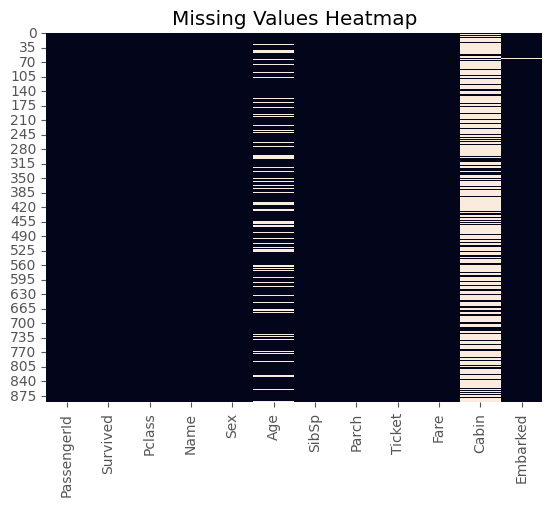

In [4]:
# Visualizing missing values
sns.heatmap(train_data.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [5]:
# Summary statistics for numerical columns
print("Summary statistics of numerical columns:")
print(train_data.describe())


Summary statistics of numerical columns:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


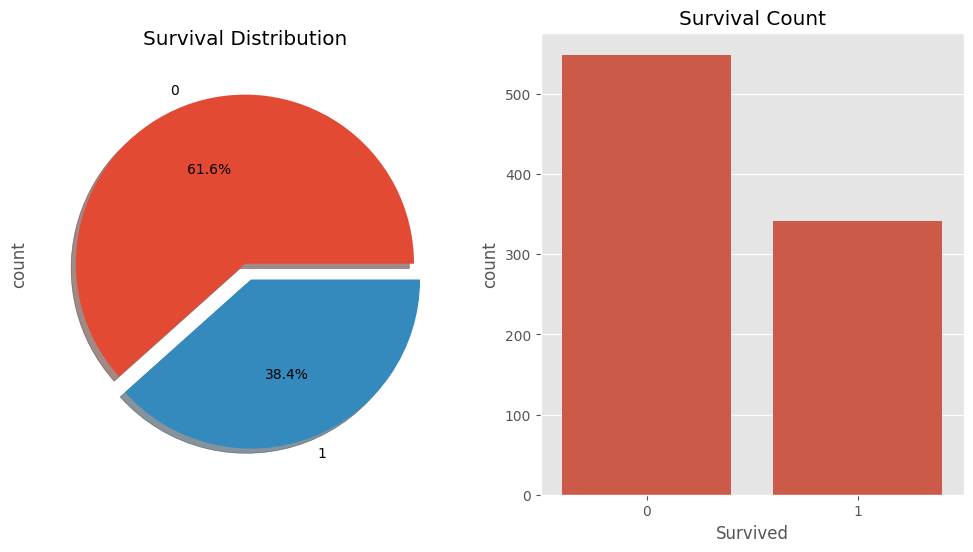

In [6]:
# Analyze survival distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
train_data['Survived'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0], explode=[0, 0.1], shadow=True)
sns.countplot(x='Survived', data=train_data, ax=axes[1])
axes[0].set_title('Survival Distribution')
axes[1].set_title('Survival Count')
plt.show()

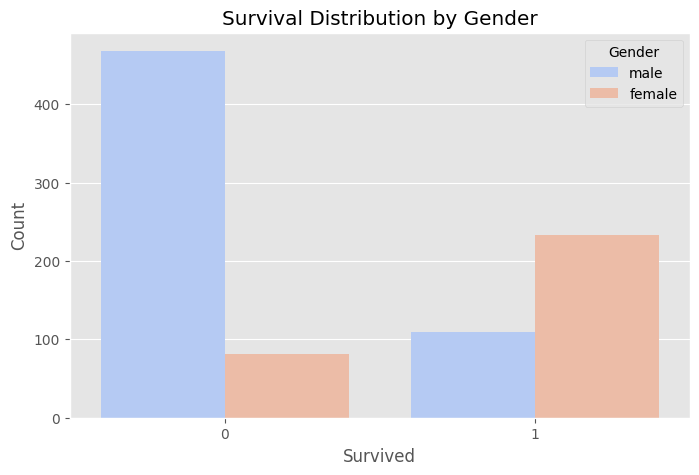

In [7]:
# Gender-based survival analysis
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='Survived', hue='Sex', palette='coolwarm')
plt.title("Survival Distribution by Gender")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.show()

In [8]:
train_data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

As we can see there was a high percentage of Female Survior

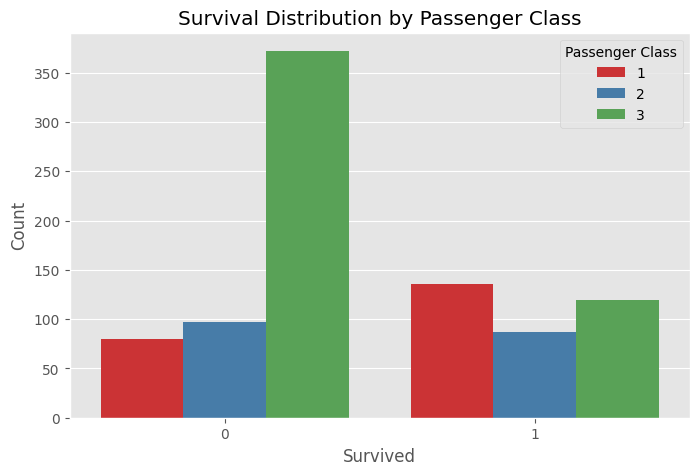

In [9]:
# Class-based survival analysis
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='Survived', hue='Pclass', palette='Set1')
plt.title("Survival Distribution by Passenger Class")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.legend(title='Passenger Class')
plt.show()

In [10]:
# Crosstab of survival and class for a tabular view
print("Survival counts by class:")
print(pd.crosstab(train_data['Survived'], train_data['Pclass']))


Survival counts by class:
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


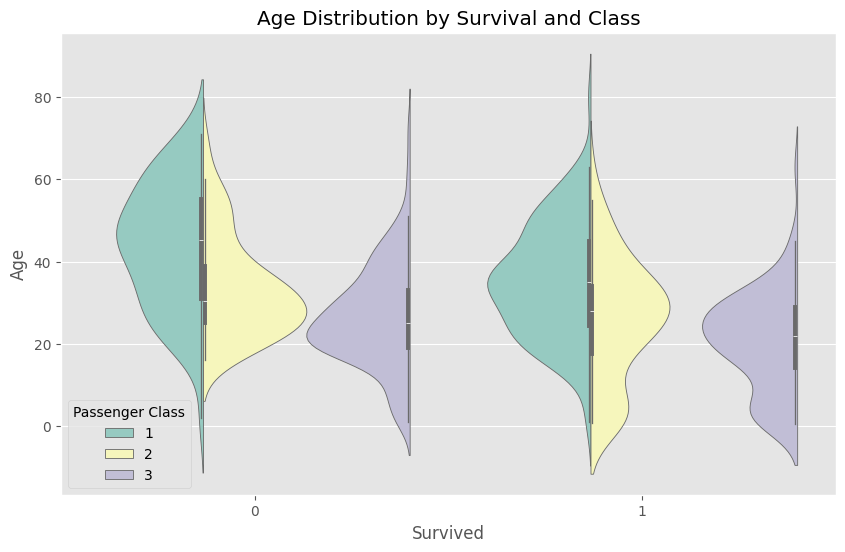

In [11]:
# Age distribution analysis by survival
plt.figure(figsize=(10, 6))
sns.violinplot(data=train_data, x='Survived', y='Age', hue='Pclass', split=True, palette='Set3')
plt.title("Age Distribution by Survival and Class")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.legend(title='Passenger Class')
plt.show()

In [12]:
print(f'The youngest Passenger: {train_data["Age"].min()}')
print(f'The Oldest Passenger: {train_data["Age"].max()}')
print(f'The average age Passenger: {round(train_data["Age"].mean(),2)} ')

The youngest Passenger: 0.42
The Oldest Passenger: 80.0
The average age Passenger: 29.7 


Observations: class 1 is more survial
- The survial Rate from age 20-40 in Pclass 1 is highe



In [13]:

# Extract titles from names for better understanding of passenger types
# The titles like 'Mr.', 'Mrs.', etc., may help in analyzing age or survival trends
train_data['Title'] =train_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
print("Extracted Titles:")
print(train_data['Title'].value_counts())


Extracted Titles:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


In [14]:
# Fill missing ages based on the average age for each title
# Create a dictionary mapping titles to their mean ages
title_age_map = train_data.groupby('Title')['Age'].mean().to_dict()
train_data['Age'] = train_data.apply(lambda row: title_age_map[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)
print("Filled missing Age values based on Title averages.")


Filled missing Age values based on Title averages.


In [15]:
train_data['Initial']=0
for i in train_data:
    train_data['Initial'] = train_data['Name'].str.extract("([A-Za-z]+)\.")
pd.crosstab(train_data['Initial'], train_data['Sex']).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
df=train_data

In [17]:

# Verify if there are any remaining missing values in the 'Age' column
print("Missing values in 'Age' after imputation:")
print(df['Age'].isnull().sum())

Missing values in 'Age' after imputation:
0


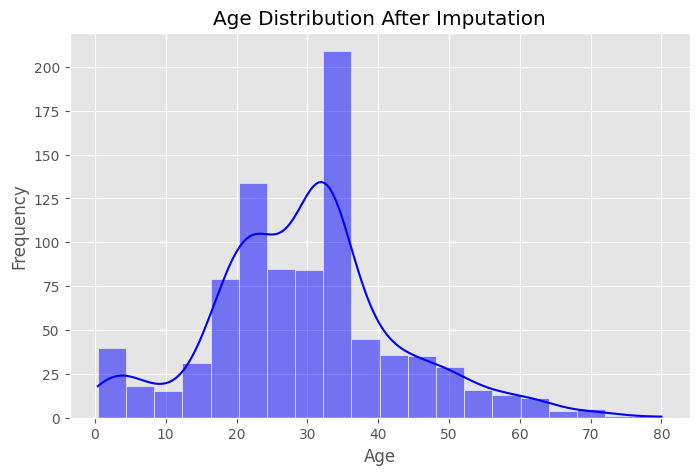

In [18]:
# Visualize the age distribution after filling missing values
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution After Imputation")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [19]:
df['Age'].isnull().any()

False

Embarked

In [20]:
pd.crosstab([df['Embarked'], df['Pclass']], [df['Sex'],df['Survived']], margins=True).T

Embarked          C          Q           S            All
Pclass            1   2   3  1  2   3    1    2    3     
Sex    Survived                                          
female 0          1   0   8  0  0   9    2    6   55   81
       1         42   7  15  1  2  24   46   61   33  231
male   0         25   8  33  1  1  36   51   82  231  468
       1         17   2  10  0  0   3   28   15   34  109
All              85  17  66  2  3  72  127  164  353  889

In [21]:
# Handle missing values in the 'Embarked' column by filling with the most common value
most_common_embarked = df['Embarked'].mode()[0]  # Find the most frequent value
df['Embarked'].fillna(most_common_embarked, inplace=True)  # Fill missing values
print(f"Missing values in 'Embarked' after imputation: {df['Embarked'].isnull().sum()}")


Missing values in 'Embarked' after imputation: 0


<ipython-input-21-a1873fba91c4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(most_common_embarked, inplace=True)  # Fill missing values


<ipython-input-22-d1389770d731>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Embarked', palette='pastel')


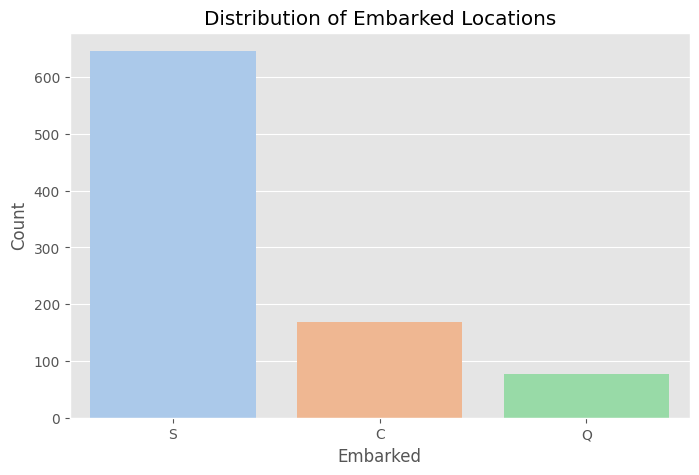

In [22]:
# Visualize the distribution of the 'Embarked' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Embarked', palette='pastel')
plt.title("Distribution of Embarked Locations")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.show()


In [23]:
# Fill missing values in 'Fare' column with the median value
median_fare = df['Fare'].median()
df['Fare'].fillna(median_fare, inplace=True)
print(f"Missing values in 'Fare' after imputation: {df['Fare'].isnull().sum()}")



Missing values in 'Fare' after imputation: 0


<ipython-input-23-9daeacd49bfd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(median_fare, inplace=True)


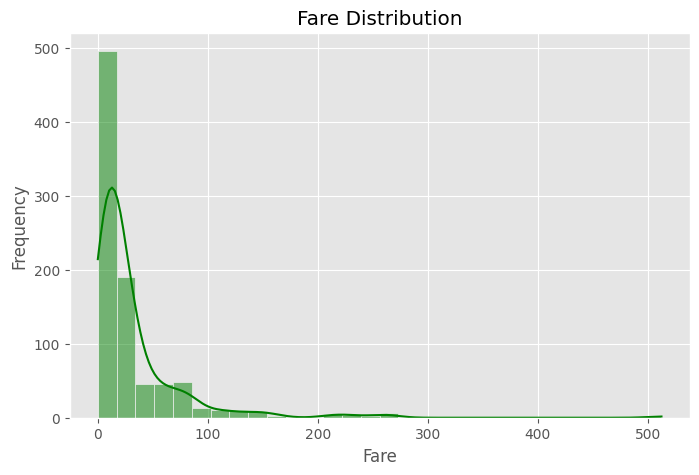

In [24]:
# Visualize the distribution of the 'Fare' column
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], bins=30, kde=True, color='green')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

majority of the passenger from either class embarked from S

In [25]:
# Drop unnecessary columns that are not useful for analysis or modeling
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(columns=columns_to_drop, inplace=True)
print("Dropped unnecessary columns.")

# Check the updated shape of the dataset after cleaning
print(f"Updated Dataset Shape: {df.shape}")


Dropped unnecessary columns.
Updated Dataset Shape: (891, 10)


feature engineering



In [26]:
# Feature Engineering: Creating new features to improve model performance

# 1. Extracting Family Size from 'SibSp' (siblings/spouses aboard) and 'Parch' (parents/children aboard)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Adding 1 to include the passenger themselves
print("Created 'FamilySize' feature.")
print(df['FamilySize'])


Created 'FamilySize' feature.
0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64


<ipython-input-27-7e693ce1f38f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='FamilySize', palette='coolwarm')


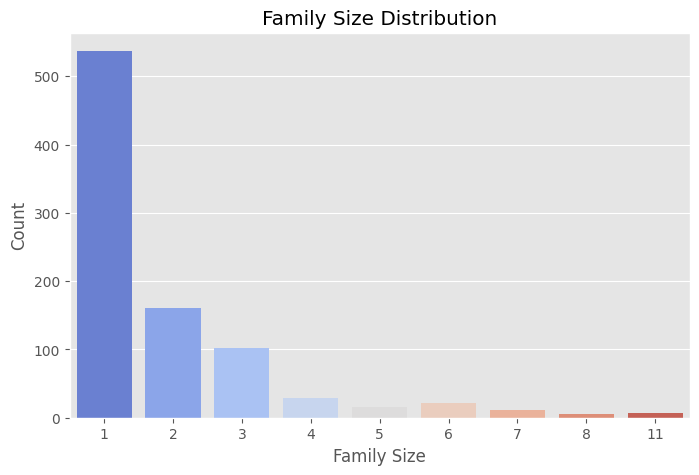

In [27]:
# Visualizing Family Size
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='FamilySize', palette='coolwarm')
plt.title("Family Size Distribution")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.show()

In [28]:
# 2. Creating a binary feature to indicate whether the passenger is traveling alone
# 2. Creating a binary feature to indicate whether the passenger is traveling alone
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)  # 1 if alone, 0 otherwise
print("Created 'IsAlone' feature.")
print(df['IsAlone'])

Created 'IsAlone' feature.
0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: IsAlone, Length: 891, dtype: int64


In [29]:
# 3. Categorizing passengers into Age Groups
bins = [0, 12, 18, 35, 60, np.inf]  # Age groups: Child, Teen, Young Adult, Adult, Senior
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
print("Created 'AgeGroup' feature.")
print(df['AgeGroup'])


Created 'AgeGroup' feature.
0      Young Adult
1            Adult
2      Young Adult
3      Young Adult
4      Young Adult
          ...     
886    Young Adult
887    Young Adult
888    Young Adult
889    Young Adult
890    Young Adult
Name: AgeGroup, Length: 891, dtype: category
Categories (5, object): ['Child' < 'Teen' < 'Young Adult' < 'Adult' < 'Senior']


<ipython-input-30-8671b1d31a10>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AgeGroup', palette='viridis')


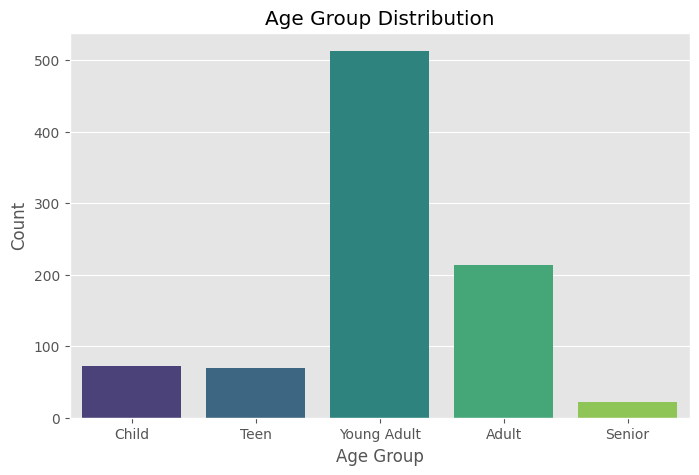

In [30]:
# Visualizing Age Group Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='AgeGroup', palette='viridis')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

In [31]:
# 4. Creating Fare Per Person Feature
# 4. Creating Fare Per Person Feature
df['FarePerPerson'] = df['Fare'] / df['FamilySize']  # Average fare per family member
print("Created 'FarePerPerson' feature.")
print(df['FarePerPerson'])

Created 'FarePerPerson' feature.
0       3.62500
1      35.64165
2       7.92500
3      26.55000
4       8.05000
         ...   
886    13.00000
887    30.00000
888     5.86250
889    30.00000
890     7.75000
Name: FarePerPerson, Length: 891, dtype: float64


In [32]:
# 5. Flagging passengers in premium classes (First Class and high fares)
# 5. Flagging passengers in premium classes (First Class and high fares)
df['PremiumClass'] = ((df['Pclass'] == 1) & (df['Fare'] > df['Fare'].median())).astype(int)
print("Created 'PremiumClass' feature.")
print(f'{df["PremiumClass"]}')

Created 'PremiumClass' feature.
0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: PremiumClass, Length: 891, dtype: int64


<ipython-input-33-12854143c0a3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='PremiumClass', palette='mako')


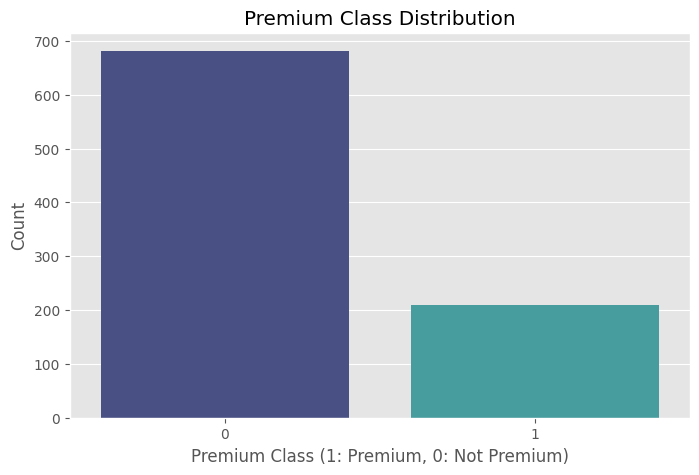

In [33]:
# Visualizing Premium Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PremiumClass', palette='mako')
plt.title("Premium Class Distribution")
plt.xlabel("Premium Class (1: Premium, 0: Not Premium)")
plt.ylabel("Count")
plt.show()


In [34]:

# 6. Encoding 'AgeGroup' as numerical for modeling
df = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True)
print("Encoded 'AgeGroup' feature.")
df

Encoded 'AgeGroup' feature.


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Initial,FamilySize,IsAlone,FarePerPerson,PremiumClass,AgeGroup_Teen,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
0,0,3,male,22.000000,1,0,7.2500,S,Mr,Mr,2,0,3.62500,0,False,True,False,False
1,1,1,female,38.000000,1,0,71.2833,C,Mrs,Mrs,2,0,35.64165,1,False,False,True,False
2,1,3,female,26.000000,0,0,7.9250,S,Miss,Miss,1,1,7.92500,0,False,True,False,False
3,1,1,female,35.000000,1,0,53.1000,S,Mrs,Mrs,2,0,26.55000,1,False,True,False,False
4,0,3,male,35.000000,0,0,8.0500,S,Mr,Mr,1,1,8.05000,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Rev,Rev,1,1,13.00000,0,False,True,False,False
887,1,1,female,19.000000,0,0,30.0000,S,Miss,Miss,1,1,30.00000,1,False,True,False,False
888,0,3,female,21.773973,1,2,23.4500,S,Miss,Miss,4,0,5.86250,0,False,True,False,False
889,1,1,male,26.000000,0,0,30.0000,C,Mr,Mr,1,1,30.00000,1,False,True,False,False


In [35]:
# 7. Creating Interaction Feature: Survival by Family Size
df['SurvivalByFamily'] = df.groupby('FamilySize')['Survived'].transform('mean')
print("Created 'SurvivalByFamily' feature (mean survival rate by family size).")
df['SurvivalByFamily']

Created 'SurvivalByFamily' feature (mean survival rate by family size).


,SurvivalByFamily
0,0.552795
1,0.552795
2,0.303538
3,0.552795
4,0.303538
...,...
886,0.303538
887,0.303538
888,0.724138
889,0.303538


In [36]:
#
# 8. Title Normalization (Revisited)
# Grouping similar titles into broader categories
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major',
                                    'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
print("Normalized 'Title' feature.")

# Convert categorical columns ('Sex', 'Embarked', and 'Title') into dummy/indicator variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)
print("Converted categorical columns into dummy variables.")

# Preview of the dataset after feature engineering
print("Dataset after feature engineering:")
print(df.head())


Normalized 'Title' feature.
Converted categorical columns into dummy variables.
Dataset after feature engineering:
   Survived  Pclass   Age  SibSp  Parch     Fare Initial  FamilySize  IsAlone  \
0         0       3  22.0      1      0   7.2500      Mr           2        0   
1         1       1  38.0      1      0  71.2833     Mrs           2        0   
2         1       3  26.0      0      0   7.9250    Miss           1        1   
3         1       1  35.0      1      0  53.1000     Mrs           2        0   
4         0       3  35.0      0      0   8.0500      Mr           1        1   

   FarePerPerson  ...  AgeGroup_Adult  AgeGroup_Senior  SurvivalByFamily  \
0        3.62500  ...           False            False          0.552795   
1       35.64165  ...            True            False          0.552795   
2        7.92500  ...           False            False          0.303538   
3       26.55000  ...           False            False          0.552795   
4        8.05000  

Predicitive modeling

In [37]:
# Step 1: Import Required Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Initial',
       'FamilySize', 'IsAlone', 'FarePerPerson', 'PremiumClass',
       'AgeGroup_Teen', 'AgeGroup_Young Adult', 'AgeGroup_Adult',
       'AgeGroup_Senior', 'SurvivalByFamily', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')

In [39]:
data=test_data.columns
data

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
#Step 2: Prepare Data for Modeling
#Separating features (X) and target variable (y)
# X = df.drop(columns=['Survived'])  # Drop unused columns
# y = df['Survived']
#feature=test_data
feature = ['PassengerId','Name', 'Age','Ticket','Fare', 'Cabin']
X = test_data.drop(columns=feature) # Changed data to test_data and removed axis argument
y = df['Survived']
y.dropna()

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [41]:
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)
X

,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,3,0,0,True,True,False
1,3,1,0,False,False,True
2,2,0,0,True,True,False
3,3,0,0,True,False,True
4,3,1,1,False,False,True
...,...,...,...,...,...,...
413,3,0,0,True,False,True
414,1,0,0,False,False,False
415,3,0,0,True,False,True
416,3,0,0,True,False,True


In [42]:
#  #Splitting data into training and testing sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Step 2: Prepare Data for Modeling
#Separating features (X) and target variable (y)
X = df.drop(columns=['Survived'])  # Use df (train_data) to create X
y = df['Survived']
y.dropna() # This line doesn't modify y in place; consider y = y.dropna() if needed

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Step 3: Logistic Regression Model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Performance:
Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



In [44]:
# Step 4: Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.8435754189944135
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       105
           1       0.80      0.82      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



In [45]:

# Step 5: XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:56:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Performance:
Accuracy: 0.8547486033519553
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       105
           1       0.84      0.80      0.82        74

    accuracy                           0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.85      0.85      0.85       179



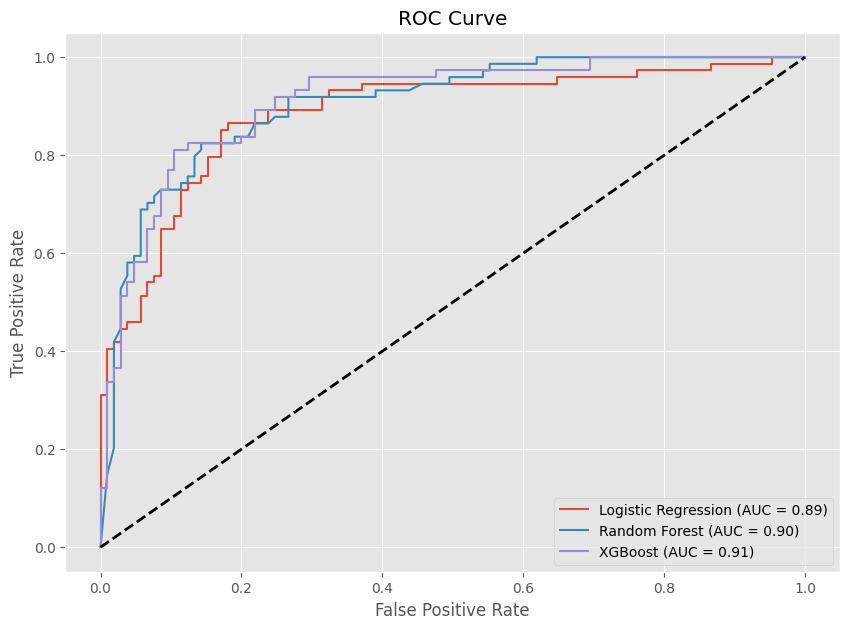

In [46]:
# Step 6: ROC Curve and AUC
models = {'Logistic Regression': log_model, 'Random Forest': rf_model, 'XGBoost': xgb_model}
plt.figure(figsize=(10, 7))

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Random guess line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

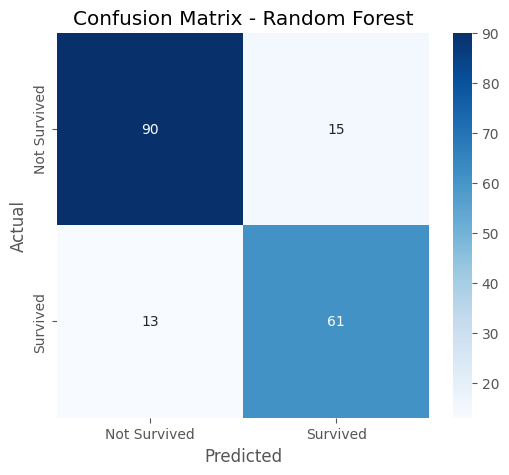

In [47]:
# Step 7: Confusion Matrix for Best Model (Random Forest Example)
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [48]:
# !pip install --upgrade xgboost
# !pip install --upgrade scikit-learn
# #!pip install scikit-learn==1.0



option is to wrap XGBClassifier inside a custom scikit-learn estimator to avoid the __sklearn_tags__ issue. This wrapper will implement a simple interface for XGBClassifier so that scikit-learn's cross-validation can be used.

In [49]:
# from sklearn.base import BaseEstimator, ClassifierMixin
# from xgboost import XGBClassifier

# class XGBClassifierWrapper(BaseEstimator, ClassifierMixin):
#     def __init__(self, **kwargs):
#         self.model = XGBClassifier(**kwargs)

#     def fit(self, X, y):
#         self.model.fit(X, y)
#         return self

#     def predict(self, X):
#         return self.model.predict(X)

#     def score(self, X, y):
#         return self.model.score(X, y)

# # Now use this wrapper in your models dictionary
# models = {
#     'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
#     'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
#     'XGBoost': XGBClassifierWrapper(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss', objective='binary:logistic')
# }

# # Cross-validation with StratifiedKFold
# for name, model in models.items():
#     cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#     cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
#     print(f"{name} Cross-Validation Accuracy Scores: {cv_scores}")
#     print(f"{name} Mean Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")
#     print(f"{name} Standard Deviation of Cross-Validation Accuracy: {np.std(cv_scores):.4f}")


 Use XGBClassifier Without cross_val_score
If none of the above solutions work, you can perform cross-validation manually by splitting the dataset and fitting the XGBClassifier without using

Logistic Regression Cross-Validation Accuracy Scores: [0.8324022346368715, 0.8202247191011236, 0.8314606741573034, 0.8314606741573034, 0.8202247191011236]
Logistic Regression Mean Cross-Validation Accuracy: 0.8272
Logistic Regression Standard Deviation of Cross-Validation Accuracy: 0.0057
Decision Tree Cross-Validation Accuracy Scores: [0.770949720670391, 0.7528089887640449, 0.7696629213483146, 0.7921348314606742, 0.797752808988764]
Decision Tree Mean Cross-Validation Accuracy: 0.7767
Decision Tree Standard Deviation of Cross-Validation Accuracy: 0.0163
KNN Cross-Validation Accuracy Scores: [0.7374301675977654, 0.7584269662921348, 0.7471910112359551, 0.7584269662921348, 0.7415730337078652]
KNN Mean Cross-Validation Accuracy: 0.7486
KNN Standard Deviation of Cross-Validation Accuracy: 0.0086
Random Forest Cross-Validation Accuracy Scores: [0.8212290502793296, 0.7865168539325843, 0.7921348314606742, 0.797752808988764, 0.8258426966292135]
Random Forest Mean Cross-Validation Accuracy: 0.80

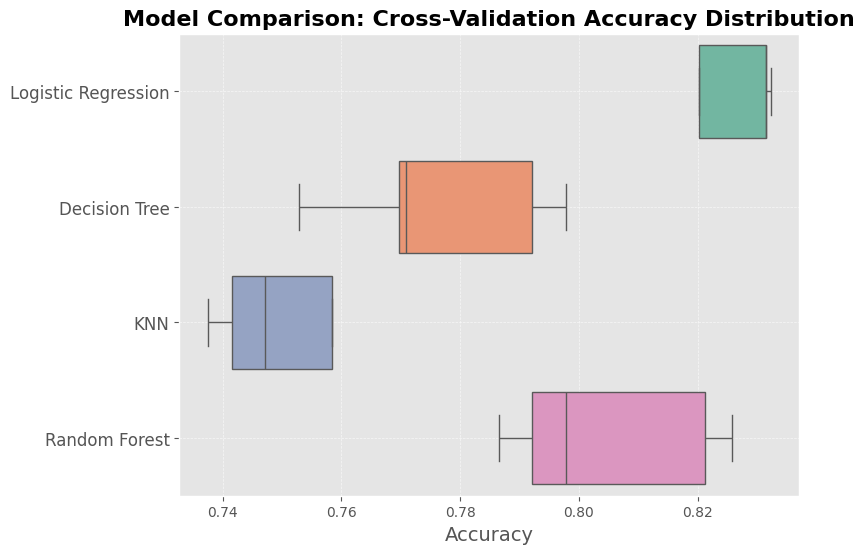

In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Initialize the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store cross-validation scores for each model
cv_scores_dict = {}

# Perform cross-validation for each model
for name, model in models.items():
    cv_scores = []
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        cv_scores.append(score)

    cv_scores_dict[name] = np.array(cv_scores)

    print(f"{name} Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"{name} Mean Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")
    print(f"{name} Standard Deviation of Cross-Validation Accuracy: {np.std(cv_scores):.4f}")

# Create a box plot for the models' cross-validation accuracy scores
plt.figure(figsize=(8, 6))  # Set figure size for better visibility

# Draw the boxplot
sns.boxplot(data=list(cv_scores_dict.values()), orient='h', palette='Set2')

# Set the x-axis labels to the model names
plt.yticks(np.arange(len(models)), models.keys(), fontsize=12)

# Title and labels
plt.title('Model Comparison: Cross-Validation Accuracy Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Accuracy', fontsize=14)

# Show gridlines
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.show()


Confusion Matrix
Confusion Matrix gives the number of correct and incorrect classifications made by the classifier.